# Описание проекта

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Даны данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования**  

* Посмотреть, сколько игр выпускалось в разные годы. 

* Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Узнать, за какой характерный срок появляются новые и исчезают старые платформы.

* Узнать, какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.

* Посмотроить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.

* Составить портрет пользователя каждого региона: 

   * Определите для пользователя каждого региона (NA, EU, JP):
       * Самые популярные платформы (топ-5). Описать различия в долях продаж.
       * Самые популярные жанры (топ-5). Пояснитт разницу.
       * Узнать, влияет ли рейтинг ESRB на продажи в отдельном регионе.
       
* Проверка гипотез

**Ход исследования**  

Исследование содержит следующие этапы:
1. Изучение данных из файла.  
2. Подготовка данных.  
    * Обработка пропусков
    * Замена типа данных
    * Обработка дубликатов  
3. Подготовка пользовательских данных
4. Исследовательский анализ данных.
5. Проверка гипотез.
6. Общий вывод.

## Изучение данных из файла

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy import stats as st

In [2]:
# чтение файла games.csv и сохранение в переменной games
if os.path.exists('/datasets/games.csv'):
    games = pd.read_csv('/datasets/games.csv', sep = ',')
else:
    games = pd.read_csv('games.csv', sep = ',')

In [3]:
# просмотр первых пяти строк таблицы games
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В таблице 11 столбцов.

Согласно документации к данным:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
# получение общей информации о данных в таблице games
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# изучим средние значения и стандартные отклонения при помощи метода describe()
games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [6]:
# определеним количество пропусков в процентах
(games.isna().mean().round(4))*100

Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

In [7]:
# проверим наличие явных дубликатов
games.duplicated().sum()

0

### Вывод:

После начального изучения данных, было обнаруженно:
* есть пропуски в столбцах: Name (0.01%), Year_of_Release (1.61%), Genre (0.01%), Critic_Score (51.32%), User_Score (40.09%), Rating (40.48%)
* там где пропуски составляют меньше 5%, просто удалим.
* тип данных у столбца Year_of_Release - float64, можно изменить на целое (int) для удобства
* тип данных у столбца User_Score - object, ниже изучим значения данного столбца подробнее и определим почему он имеет такой тип.
* все значения, в пределах нормы.
* проверили на наличие явных дубликатов, убедились, что они отсутствуют.

## Подготовка данных

In [8]:
# приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()

In [9]:
# От строк с пропусками в столбцах 'name', 'year_of_release', 'genre' избавимся методом dropna(). 
games = games.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop = True) 

In [10]:
# для удобства просмотра данных меняем тип данных на целочисленный 
games['year_of_release'] = games['year_of_release'].astype('int') 

In [11]:
#поиск пропусков методом isna() в столбце 'rating'
games[games['rating'].isna()].sample(5, random_state=104)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5299,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016,Action,0.07,0.14,0.11,0.02,NaN,NaN,NaN
10495,LEGO Rock Raiders,PS,1999,Strategy,0.06,0.04,0.00,0.01,NaN,NaN,NaN
3615,Mortal Kombat 3,PS,1995,Fighting,0.29,0.20,0.02,0.04,NaN,NaN,NaN
5639,Jampack: Summer 2003 (RP-M),PS2,2003,Misc,0.15,0.12,0.00,0.04,NaN,NaN,NaN
7410,Shining Blade,PSP,2012,Role-Playing,0.00,0.00,0.20,0.00,NaN,NaN,NaN


In [12]:
# посмотрим уникальные значения и их кол-во в столбце 'rating'
games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

 В ESRB есть категория, которой не присвоен окончательный рейтинг, она обозначается - RP. Скорее всего пропуски означают, что игре еще не присвоена категория. Заменим все пропуски данным обозначением. Так же видно есть обозначение К-А его нет в ESRB. К-А рейтинг присвоен всего трем играм, тк кол-во не большое, заменим данный рейтинг тоже категорией RP.

In [13]:
# замена пропусков в столбце rating на RP ('категория, которой не присвоен окончательный рейтинг')
games['rating'] = games['rating'].fillna('RP')

In [14]:
# замена значения К-А в столбце rating на RP
games['rating'] = games['rating'].replace('K-A', 'RP') 

In [15]:
# посмотрим уникальные значения и их кол-во в столбце 'user_score'
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
0.7       2
0.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Видно что самое большое кол-во занимает значение tbd - оно означает "будет определено". То есть рейтинг в данный момент не определен, но скоро будет. Заменим его на nan, для удобства при дальнейших вычислениях. А затем сгрупируем данные по платформам и заполним все пропуски средним значением по ним.

In [16]:
# замена значения tbd в столбце user_score на nan
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')

In [17]:
# заменим тип данных у столбца user_score на float
games['user_score'] = games['user_score'].astype(float)

In [18]:
#заполним пропуски заглушкой - 0
games['user_score'] = games['user_score'].fillna(0)
games['critic_score'] = games['critic_score'].fillna(0)

In [19]:
# проверим остались ли пропуски
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [20]:
# посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец
games['sum_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [21]:
# посмотрим обновленную таблицу
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38


### Вывод:

При подготовке данных, мы:

- привели все названия столбцов к нижнему регистру.

- удалили строчки в столбцах (name, year_of_release и genre), где пропуски составили меньше 5 %.

- изменили тип данных у столбцов year_of_release (на int) и user_score (на float)

- изучили пропуски в столбце rating и заменили их и значение "К-А" на значения "RP".

- значение "tbd" в столбце user_score заменили на nan.

- остальные пропущенные значения с рейтингами в столбцах critic_scor, user_score мы заполнили заглушкой - 0.
- для дальнейших расчетов, добавили новый столбец к таблице с суммой всех продаж по всем регионам.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. 

In [22]:
# применим метод groupby
games_cnt = (games.groupby('year_of_release')
                  .agg({'name':'count'})
                  .reset_index()
                  .rename(columns={'name':'counts'}))
games_cnt

,year_of_release,counts
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


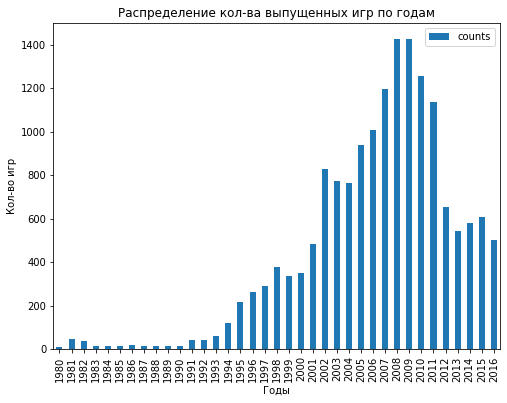

In [23]:
# построим график распределения кол-ва выпущенных игр по годам
games_cnt.plot(x='year_of_release', y='counts', kind='bar', figsize=(8, 6)) 
plt.title('Распределение кол-ва выпущенных игр по годам')
plt.xlabel('Годы')
plt.ylabel('Кол-во игр')
plt.show()

#### Вывод:

Данные по играм даны с 1980 по 2016 года.

Если рассматривать весь период, то в 2008 и 2009 годы выпустилось всех больше игр (1427 и 1426), всех меньше выпустилось игр в 1980 (9).

По графику видно, что до 1995 было выпущено менее 200 игр в год, возможно стоит пренебречь отрезком с 1980 до 1995 года.

### Оценка: как менялись продажи по платформам. 

In [24]:
# выберем 10 платформ с наибольшими суммарными продажами
games_top_10 = games.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)
games_top_10 = games_top_10.head(10)
games_top_10

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: sum_sales, dtype: float64

In [25]:
# создадим новую таблицу, куда войдут только топ-10 платформ по сумме продаж
games_top = games.query('platform in (@games_top_10.index)')

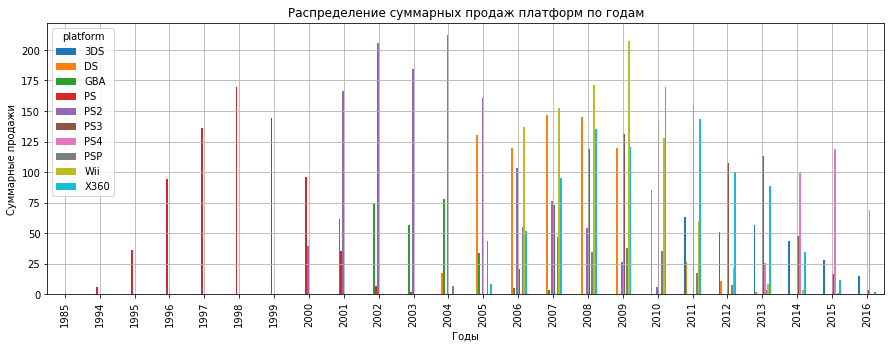

In [26]:
# построим распределение по годам данных платформ 
(games_top.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum')
         .plot(kind='bar', grid=True, figsize=(15, 5)))
plt.title('Распределение суммарных продаж платформ по годам')
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи')
plt.show()

#### Вывод:

1. Выбрали топ-10 платформ с наибольшими суммарными продажами.
2. Построили распределение по годам
3. Из графика видно, что в среднем платформа "живет" около 10 лет.
4. График опять же подтверждает теорию выше, о том, что надо пренебречь данными за года с 1980 до 1995. Так мы видим, что в топ-10 платформ по сумме продаж вошли платформы как раз примерно начиная с 1995 года. Нет смысла анализировать платформы с маленькими продажами, так как нам надо выявить закономерности определяющие успешность игр. А сумму продаж как раз можно отнести к одному из определений успеха.
5. Так как мир игровой индустрии очень динамично меняется во времени и чтобы не захватить отжившие тренды выберем актуальный период 2 года, то есть будем исследовать дальше данные за 2015-2016 года.

Обновим нашу таблицу и оставим данные только начиная с 2015 года.

In [27]:
# перезапишем таблицу games и при помощи метода query() отберем года, начиная с 2015 года.
games = games.query('year_of_release>2014')

### Платформы, лидирующие по продажам.

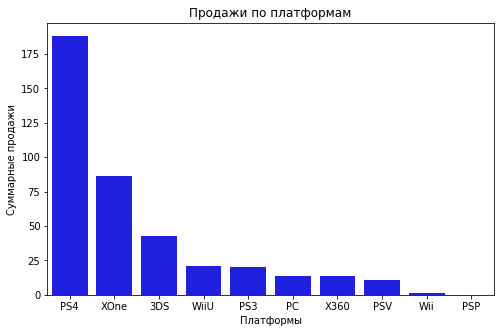

In [28]:
# сгрупируем данные по платформам, посчитаем общую сумму их продаж, отсортируем
games_ptf = (games.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum')
                 .reset_index()
                 .sort_values(by='sum_sales', ascending=False))
 
# построим график распределния  продаж по платформам при помощи barplot()
plt.figure(figsize=(8, 5))
sns.barplot(data = games_ptf, x='platform', y='sum_sales', color = 'blue')
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.show()    

In [29]:
# выберем 5 платформ с наибольшими суммарными продажами
games_top_5 = (games_ptf.groupby('platform')
                       .agg({'sum_sales':'sum'})
                       .sort_values(by='sum_sales', ascending=False)
                       .reset_index())
games_top_5 = games_top_5.head(5)
games_top_5

,platform,sum_sales
0,PS4,188.15
1,XOne,86.29
2,3DS,42.92
3,WiiU,20.95
4,PS3,20.42


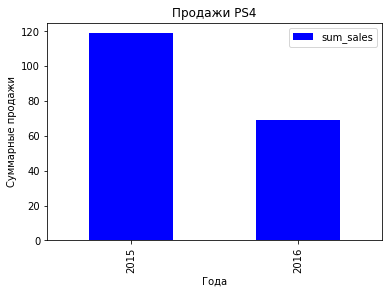

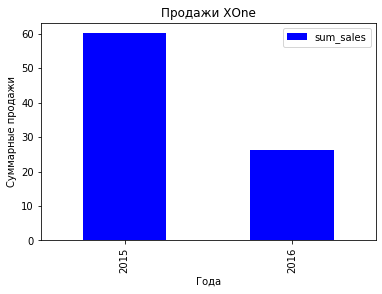

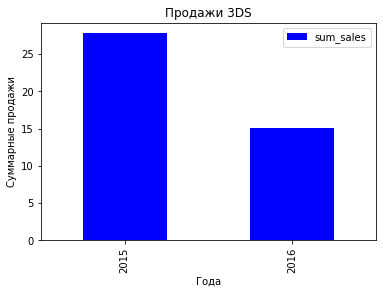

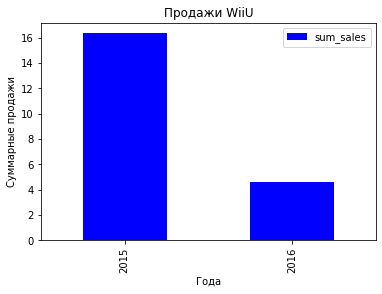

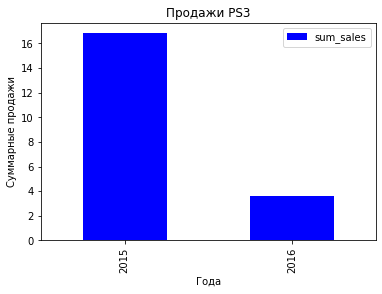

In [30]:
 # создадим цикл для формирования графиков

for platform in games_top_5['platform']:
    (games
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
     .plot( kind='bar', color = 'blue')
    )
    plt.title(f'Продажи {platform}')
    plt.xlabel('Года')
    plt.ylabel('Суммарные продажи')
    plt.show()

#### Вывод:
1. Исходя из общей суммы по продажам по каждой платформе, мы выбрали несколько потенциально прибыльных платформ. В их число вошли такие платформы как: PS4, XOne, 3DS, WiiU, PS3.
2. 2015 год у всех пяти платформ был гораздо прибыльней, чем 2016, но данные за 2016 год могут быть не все, как описано в задании, поэтому и возможно меньше прибыль за него. Это говорит о том, что хорошо, что мы выбрали за актуальный период 2 года. Делать выводы лучше по полным данным.


### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

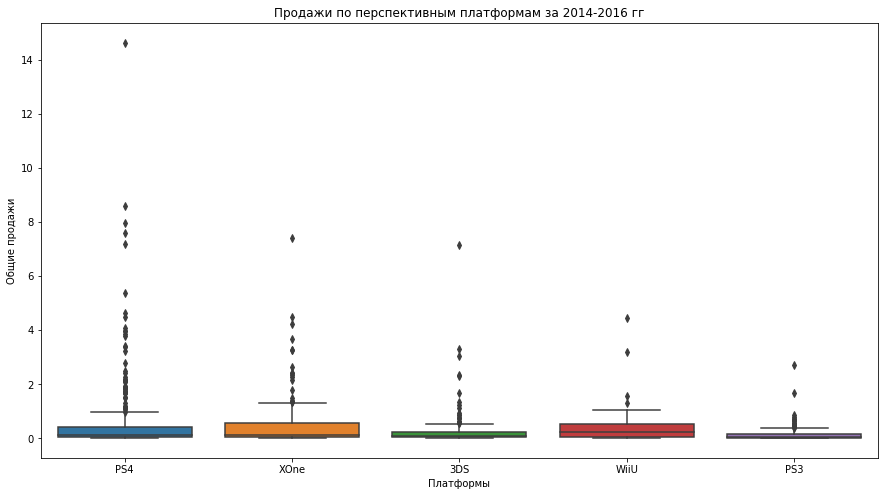

In [31]:
# при помощи query() выберем топ-5 прибыльных платформ и запишем их в новую переменную new_games
new_games = games.query('platform in ["PS4", "XOne", "3DS", "WiiU", "PS3"]')

# построим граафик "ящик с усами" при помощи sns.boxplot
plt.figure(figsize=(15,8))
(sns.boxplot(data = new_games, y = 'sum_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи'))
plt.show()

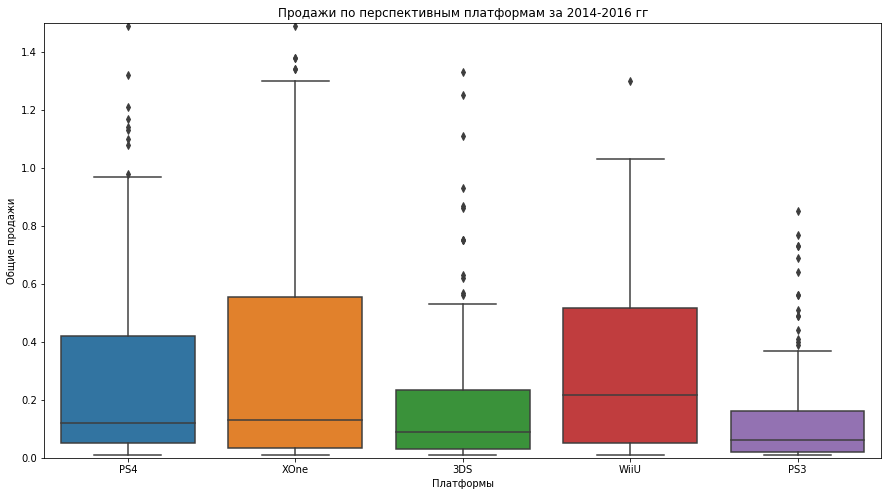

In [32]:
# теперь построим "ящик с усами" с ограничением по оси у, для того, чтоб лучше увидеть медиану и квантили
plt.figure(figsize=(15,8))
(sns.boxplot(data = new_games, y = 'sum_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи'))
plt.ylim(0, 1.5)
plt.show()

#### Вывод:

Исходя из графика видно, что у всех пяти платформ присутствуют выбросы. 

У платформы PS4 всех больше выбросы, это говорит о том, что у данной платформы были большие продажи.

Возможно, если мы удалим выбросы по всем платформам, то в топ-5 платформ попадут уже другие платформы. Но так как мы ищем в чем успех платформ, я думаю, не стоит удалять выбросы, ведь супер большие продажи как раз можно отнести к критерию успеха.

На втором графике видно, что распределение продаж среди платформ не сильно отличаются, медиана продаж у платформ PS4 и XOne ~ 0,1 миллиона проданных копий, у платформ 3DS и PS3 ~ 0,05 миллиона проданных копий, ну и лидер по медиане 0,2 миллиона проданных копий это платформа WiiU.


### Влияние на продажи внутри одной популярной платформы по отзывам пользователей и критиков. Диаграмма рассеяния и корреляция между отзывами и продажами. ### 

Будем рассматривать как влияют отзывы на продажи внутри платформы PS4

In [33]:
#  создадим новую таблицу reviews_games, куда войдет только платформа PS4
reviews_games = games.query('platform == "PS4"')
reviews_games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,RP,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


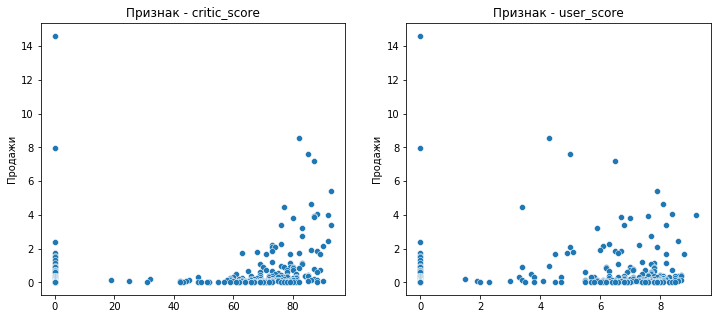

In [34]:
# построим диаграмму рассеяния между отзывами и продажами
scatterplot_columns = ['critic_score', 'user_score']
col_count, row_count = 2, 1 # число рядов и столбцов в сетке графиков
plt.figure(figsize=(12, 5))
 
for i, f in enumerate(scatterplot_columns):           
    sns.scatterplot(x=reviews_games[f], y=reviews_games['sum_sales'], ax = plt.subplot(row_count, col_count, i+1)) 
    plt.title(f'Признак - {f}')
    plt.ylabel("Продажи")
    plt.xlabel("")

In [35]:
# расчитаем корреляцию между отзывами и продажами
columns = ['user_score', 'critic_score', 'sum_sales']
reviews_games[columns].corr()

,user_score,critic_score,sum_sales
user_score,1.000000,0.888693,0.075201
critic_score,0.888693,1.000000,0.181879
sum_sales,0.075201,0.181879,1.000000


#### Вывод:

Посмотрев, как влияют на продажи внутри платформы PS2 отзывы пользователей и критиков, можно предположить, что прямой зависимости от отзывов нет. Прослеживается связь по отзывам критиков, что чем ближе отзывы к макисмальной оценке, тем тем больше сумма продаж, но это связь не прямолинейная. После отметки больше 60 баллов появляются продажи свыше 1,5 млн. По отценкам пользователей зависимости оценок и продаж почти нет.

По таблице корреляции можно предположить, что зависимость продаж от оценки критиков есть, но она все ровно не большая.

**Сравним данные полученные по платформе PS4, с другими платформами, вошедшими в топ-5.**

Выше мы создали таблицу new_games, куда только вошли топ-5 лучших платформ по сумме продаж

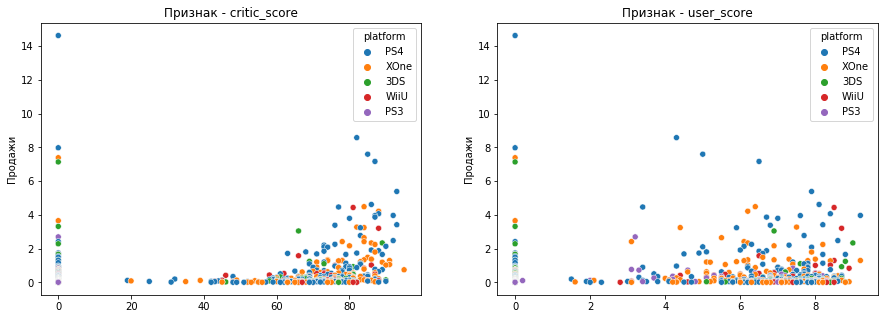

In [36]:
# построим диаграмму рассеяния между отзывами и продажами всех пяти платформ

plt.figure(figsize=(15, 5))
 
for i, f in enumerate(scatterplot_columns): 
    sns.scatterplot(x=new_games[f], y=new_games['sum_sales'], hue = new_games['platform'], ax = plt.subplot(row_count, col_count, i+1)) 
    plt.title(f'Признак - {f}')
    plt.ylabel("Продажи")
    plt.xlabel("")

In [37]:
# расчитаем корреляцию между отзывами и продажами
columns = ['user_score', 'critic_score', 'sum_sales']
reviews_games[columns].corr()

,user_score,critic_score,sum_sales
user_score,1.000000,0.888693,0.075201
critic_score,0.888693,1.000000,0.181879
sum_sales,0.075201,0.181879,1.000000


#### Вывод:

При сравнении уже пяти платформ по отзывов, мы видим, что зависимость продаж от оценки пользователей нет. А зависимость продаж от оценки критиков, пусть и не большая, но присутствует у всех пяти платформ. 


### Общее распределение игр по жанрам. 

Так как мы пытаемся вывести успех платформ, то распределение по жанрам будем просматривать, только у тех платформ, кто вошел в топ-10

In [38]:
# перепишем пременную games_top_10 уже по актуальному периоду
games_top_10 = games.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)
games_top_10 = games_top_10.head(10)
games_top_10

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Wii       1.32
PSP       0.12
Name: sum_sales, dtype: float64

In [39]:
# перепишем пременную games_top_10 уже по актуальному периоду
games_top = games.query('platform in (@games_top_10.index)')

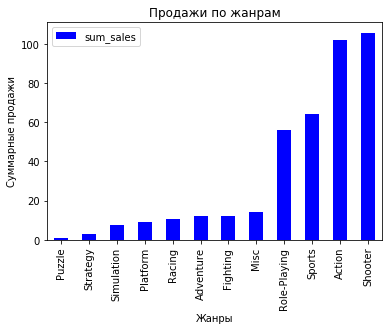

In [40]:
 # создадим цикл для формирования графиков
(games_top
         .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
         .sort_values(by='sum_sales')
         .plot( kind='bar', color = 'blue'))
plt.title('Продажи по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи')
plt.show()

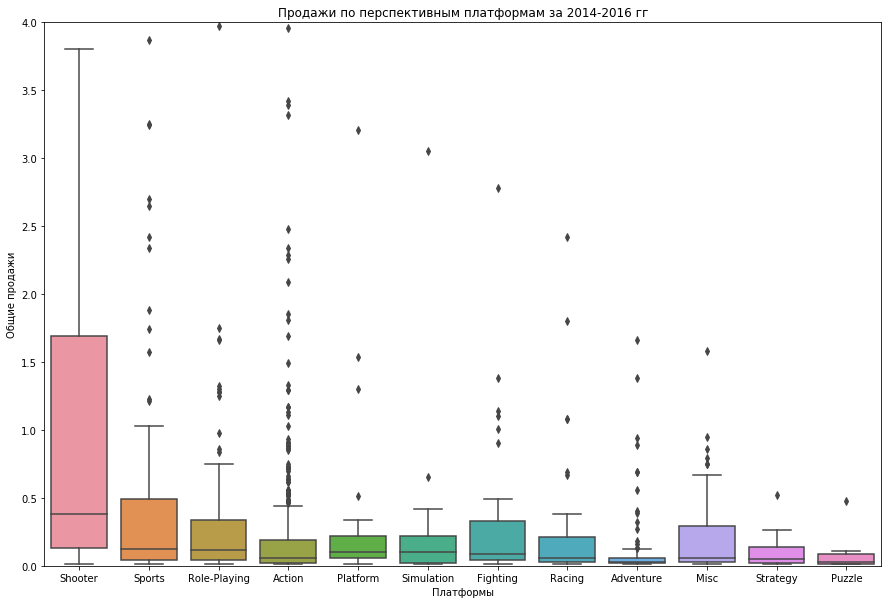

In [41]:
# посмотрим на медианы продаж по жанрам
plt.figure(figsize=(15,10))
(sns.boxplot(data = games_top, y = 'sum_sales', x='genre')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи'))
plt.ylim(0, 4)
plt.show()

#### Вывод:

Из первого графика распределения можно выделить:
* топ-3 самых прибыльных жанров:
    * Shooter
    * Action
    * Sports
    
* топ-3 самых не прибыльных жанров:    
    * Simulation
    * Strategy
    * Puzzle
    
* по медианам подтверждается, что лучший жанр это Shooter, а вот Sports обогнал Action. И по медиане тройка лидеров поменялась и стала: Shooter, Sports, Role-Playing    

Action выиграл по графику распределения, благодаря выбросам.

## Портрет пользователя каждого региона.

Определим для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы (топ-5). Различия в долях продаж.

In [42]:
# создадим новые столбцы, где высчитаем доли продаж в кажом регионе от общей суммы продаж
games['na_ratio_sales'] = (games['na_sales']/games['sum_sales'])
games['eu_ratio_sales'] = (games['eu_sales']/games['sum_sales'])
games['jp_ratio_sales'] = (games['jp_sales']/games['sum_sales'])

In [43]:
# проверим как заполнились столбцы
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,na_ratio_sales,eu_ratio_sales,jp_ratio_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,RP,14.63,0.412167,0.400547,0.024607
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,0.130536,0.713287,0.006993
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,RP,7.98,0.374687,0.437343,0.027569


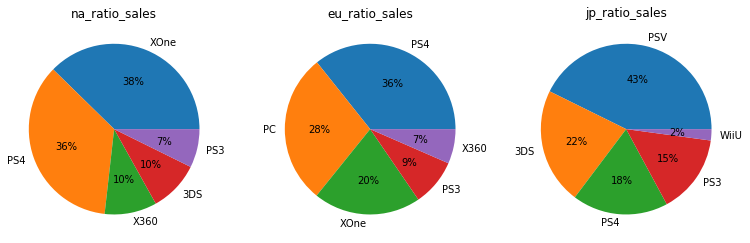

In [44]:
# построим круговые диаграммы с долями продаж в каждом регионе от общей суммы
column=['na_ratio_sales', 'eu_ratio_sales', 'jp_ratio_sales']
col, row = 3, 1 # число рядов и столбцов в сетке графиков
plt.figure(figsize=(13, 13))
for i, j in enumerate(column):
    (games
     .groupby('platform')[j]
     .sum()
     .sort_values(ascending = False)
     .head(5)
     .plot(kind = 'pie', autopct='%1.0f%%',  ax = plt.subplot(row, col, i+1)))
    plt.title(f'{j}')
    plt.ylabel("")

#### Вывод:

Отобрав для каждого региона только топ-5 самых популярных платформ и высчитав доли продаж в этих регионах от общей суммы, можно предположить:
* в Северной Америке в топ-5 вошли платформы: XOne, PS4, X360, 3DS, PS3
* в Европе в топ-5 вошли платформы: PS4, PS, XOne, PS3, X360
* в Японии в топ-5 вошли платформы: PSV, 3DS, PS4, PS3, WiiU

Можно выделить платформы PS3 и PS4, она популярна во всех регионах.

В остальном у каждого региона имеются, свои предпочтения по платформам. И они сильно отличаются, это стоит иметь ввиду при формировании рекламного бюджета, в каждом регионе стоит делать упор на свои платформы.

### Самые популярные жанры (топ-5). 

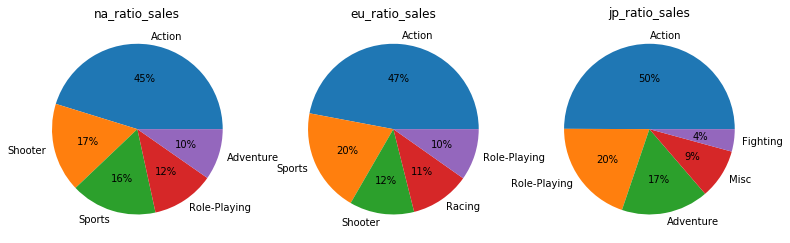

In [45]:
# построим круговые диаграммы с долями продаж для каждого жанра от общей суммы

plt.figure(figsize=(13, 13))
for i, j in enumerate(column):
    (games
     .groupby('genre')[j]
     .sum()
     .sort_values(ascending = False)
     .head(5)
     .plot(kind = 'pie', autopct='%1.0f%%',  ax = plt.subplot(row, col, i+1)))
    plt.title(f'{j}')
    plt.ylabel("")

#### Вывод:
По жанрам, у регионов оказалось больше общего. 
* в Северной Америке в топ-5 вошли жанры: Action, Shooter, Sports, Role-Playing, Adventure
* в Европе в топ-5 вошли платформы: Action, Sports, Shooter, Racing, Role-Playing
* в Японии в топ-5 вошли платформы: Action, Role-Playing, Adventure, Misc, Fighting

В Северной Америке и Европе, жанры почти сопадают, единственное различие это доли продаж каждого жанра.

В Японии как и по платформа отличия более явные, три платформы совпадают, две нет.

По всем регионам в топ-5 вошли: Action и Role-Playing. Данные жанры можно отнести к показателям успеха. 


### Влияние рейтинга ESRB на продажи в отдельном регионе.

Обозначения рейтинга ESRB:
* E - Для всех
* EC - Для детей младшего возраста
* E10+ - Для всех от 10 лет и старше
* T - Подросткам
* M - Для взрослых 17+
* AO - Только для взрослых 18+
* RP - Рейтинг ожидается

Данный реитинг распространяется для стран США и Канады, поэтому будет корректным рассматривать из регионов по данному рейтингу только США.

Text(0, 0.5, '')

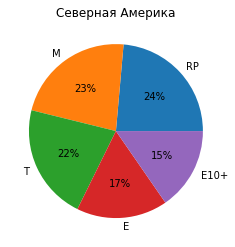

In [46]:
# построим круговую диаграмму с долями продаж по рейтингу ESRB от общей суммы
# рассмотрим первые пять максимальных значений 
(games
     .groupby('rating')['na_ratio_sales']
     .sum()
     .sort_values(ascending = False)
     .head()
     .plot(kind = 'pie', autopct='%1.0f%%'))
plt.title(f'Северная Америка')
plt.ylabel("")

#### Вывод:
Так как по рейтингу мы можем оценить доли продаж только в Америке, мы не можем судить о данных для всех регионов. Данная информация может пригодиться только для планирования рекламной компании именно в Америке.

По данной диаграмме можно только предположить, что чаще всего играют в игры люди в возрасте 15+.

### Вывод:

Из выше проведенного анализа, можно составить портрет пользователя каждого региона:

**Портрет игрока из Северной Америке:**
* любимая платформа XOne
* любимы жанр Action

**Портрет игрока из Европы:**
* любимая платформа PS4
* любимы жанр Action

**Портрет игрока из Японии:**
* любимая платформа PSV
* любимы жанр Action

## Проверьте гипотезы

**Гипотеза №1: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC не равны.

In [47]:
('Средний пользовательский рейтинг платформы Xbox One',
 round(games.query('platform == "XOne"')['user_score'].mean(),2))

('Средний пользовательский рейтинг платформы Xbox One', 4.74)

In [48]:
('Средний пользовательский рейтинг платформ PC', 
 round(games.query('platform == "PC"')['user_score'].mean(),2))

('Средний пользовательский рейтинг платформ PC', 5.09)

In [49]:
# выборка среднего пользовательского рейтинга платформы Xbox One
xbox = games.query('platform=="XOne"')['user_score']

In [50]:
# выборка среднего пользовательского рейтинга платформы PS
ps = games.query('platform=="PC"')['user_score']

In [51]:
alpha = 0.05 

results = st.ttest_ind(xbox, ps)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3726755182886019
Не получилось отвергнуть нулевую гипотезу


**Гипотеза №2: средние пользовательские рейтинги жанров Action и Sports разные.**

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

In [52]:
('Средний пользовательский рейтинг жанра Action',
 round(games.query('genre == "Action"')['user_score'].mean(),2))

('Средний пользовательский рейтинг жанра Action', 3.05)

In [53]:
('Средний пользовательский рейтинг жанра Sports',
round(games.query('genre == "Sports"')['user_score'].mean(),2))

('Средний пользовательский рейтинг жанра Sports', 3.98)

In [54]:
# выборка среднего пользовательского рейтинга жанра action
action = games.query('genre=="Action"')['user_score']

In [55]:
# выборка среднего пользовательского рейтинга жанра Sports
sports = games.query('genre=="Sports"')['user_score']

In [56]:
alpha = 0.05 

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.010648802104801127
Отвергаем нулевую гипотезу


### Вывод:

* По первой гепотезе, P-значение составляет 37,26%, это слишком высокая вероятность для того, чтобы делать выводы о значимом различии между  между средними рейтингами платформ Xbox One и PC.
* По второй гепотезе, P-значение достаточно мало, что даёт основание отвергнуть предположение о равенстве между рейтингами жанров Action и Sports.

## Общий вывод:

I. Перед анализом, мы подготовили данные, а именно:

1. привели все названия столбцов к нижнему регистру;

2. удалили строчки в столбцах (name, year_of_release и genre), где пропуски составили меньше 5 %;

3. изменили тип данных у столбцов: year_of_release на int и user_score на float;

4. изучили пропуски в столбце rating и заменили их и значение "К-А" на значения "RP".

5. значение "tbd" в столбце user_score заменили на nan;

6. на остальные пропущенные значения с рейтингами в столбцах critic_scor, user_score мы поставили заглушку - 0;

7. проверили на наличие явных дубликатов, убедились, что они отсутствуют;

8. для дальнейших расчетов, добавили новый столбец к таблице с суммой всех продаж по всем регионам sum_sales.

II. Исследовательский анализ данных:

1. После выбора топ-10 платформ с наибольшими суммарными продажами, было обнаружено:

    * Что в среднем платформа "живет" около 10 лет;
    * Выбрали актуальный период - 2 последних год (2015-2016 года)
    * Обновили нашу таблицу games и оставим данные только начиная с 2015 года.
    
    
2. Выявили платформы, лидирующие по продажам.

    * Исходя из общей суммы по продажам по каждой платформе, мы выбрали несколько потенциально прибыльных платформ. В их число вошли такие платформы как: PS4, XOne, 3DS, WiiU, PS3.
    
    
3. Обнаружили выбросы:

    * Из графика "ящик с усами" видно, что у всех пяти платформ присутствуют выбросы. 
    * У платформы PS4 всех больше выбросы, это говорит о том, что у данной платформы были большие продажи.
    * На втором графике видно, что распределение продаж среди платформ не сильно отличаются, медиана продаж у платформ PS4 и XOne ~ 0,1 миллиона проданных копий, у платформ 3DS и PS3 ~ 0,05 миллиона проданных копий, ну и лидер по медиане 0,2 миллиона проданных копий это платформа WiiU.
    
    
4. Рассмотрели влияние продаж от отзывов пользователей и критиков:

    * Посмотрев, как влияют на продажи внутри платформы PS2 отзывы пользователей и критиков, сделали предположение, что прямой зависимости от отзывов нет. Прослеживается связь по отзывам критиков, что чем ближе отзывы к макисмальной оценке, тем тем больше сумма продаж, но это связь не прямолинейная. После отметки больше 60 баллов появляются продажи свыше 1,5 млн. По отценкам пользователей зависимости оценок и продаж почти нет.
    * По таблице корреляции можно предположить, что зависимость продаж от оценки критиков есть, но она все ровно не большая.
    * При сравнении уже пяти платформ по отзывов, мы видим, что зависимость продаж от оценки пользователей нет. А зависимость продаж от оценки критиков, пусть и не большая, но присутствует у всех пяти платформ.
    
    
5. Из графика можно выделить:

    * топ-3 самых прибыльных жанров:

       * Shooter
       * Action
       * Sports

    * топ-3 самых не прибыльных жанров:

       * Simulation
       * Strategy
       * Puzzle

    * по медианам подтверждается, что лучший жанр это Shooter, а вот Sports обогнал Action. И по медиане тройка лидеров поменялась и стала: Shooter, Sports, Role-Playing

    * Action выиграл по графику распределения, благодаря выбросам.
      
      
6. Составили портреты пользователей каждого региона:

    * Портрет игрока из Северной Америке:

      - любимая платформа XOne
      - любимы жанр Action
      
    * Портрет игрока из Европы:

      - любимая платформа PS4
      - любимы жанр Action
      
    * Портрет игрока из Японии:

      - любимая платформа PSV
      - любимы жанр Action
      
III. Проверка гипотез:

1. Мы проверили две гипотезы при помощи ttest.

**Гипотеза №1**: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые - получив P-значение 37.26% мы не отвергли нулевую гипотезу, и предположили, что различия между средними рейтингами платформ не велико. 

**Гипотеза №2**: средние пользовательские рейтинги жанров Action и Sports разные - получив P-значение  очень маленькое мы отвергли нулевую гипотезу о равенстве между рейтингами жанров Action и Sports.


IV. Успех игр:

После анализа, можно выявить ряд критериев успеха игр, а именно обратить внимание на:
   * платформы PS4, XOne, 3DS, WiiU, PS3;
   * жанры Action, Sports, Shooter, Role-Playing;
   * что высокие оценки критиков тоже могут повлиять на рост продаж;
   * не забывать о предпочтениях в регионах - они отличаются;
   * жанр Action и платформа PS3 и PS4 попали почти во все высокие рейтинги;
   * перед тем как планировать кампанию на какой-либо год, стоит брать в учет для анализа не более 2 предшествующих лет.